In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-new/GBvideos.csv
/kaggle/input/youtube-new/MXvideos.csv
/kaggle/input/youtube-new/KRvideos.csv
/kaggle/input/youtube-new/MX_category_id.json
/kaggle/input/youtube-new/GB_category_id.json
/kaggle/input/youtube-new/US_category_id.json
/kaggle/input/youtube-new/IN_category_id.json
/kaggle/input/youtube-new/DEvideos.csv
/kaggle/input/youtube-new/KR_category_id.json
/kaggle/input/youtube-new/RU_category_id.json
/kaggle/input/youtube-new/FRvideos.csv
/kaggle/input/youtube-new/USvideos.csv
/kaggle/input/youtube-new/INvideos.csv
/kaggle/input/youtube-new/RUvideos.csv
/kaggle/input/youtube-new/CA_category_id.json
/kaggle/input/youtube-new/DE_category_id.json
/kaggle/input/youtube-new/JP_category_id.json
/kaggle/input/youtube-new/JPvideos.csv
/kaggle/input/youtube-new/FR_category_id.json
/kaggle/input/youtube-new/CAvideos.csv


In [2]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
from datetime import datetime
import glob
import os
import json
import pickle
import six
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None
os.chdir("../input/youtube-new")

In [3]:
#path=("../input/youtube-new")
#allcsv= glob.glob(path + "/*.csv")
all_csv=[i for i in glob.glob("*.{}".format("csv"))]
all_csv

['GBvideos.csv',
 'MXvideos.csv',
 'KRvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'INvideos.csv',
 'RUvideos.csv',
 'JPvideos.csv',
 'CAvideos.csv']

In [4]:
all_dfs=[]
for i in all_csv:
    df=pd.read_csv(i,index_col=None ,encoding='ISO-8859-1')
    df['country']=i[0:2] 
    all_dfs.append(df)
all_dfs[0].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,GB
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,GB
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,GB
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,GB
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,GB


In [5]:
data_frame=pd.DataFrame()
data_frame=pd.concat(all_dfs)
data_frame['trending_date'].head()

0    17.14.11
1    17.14.11
2    17.14.11
3    17.14.11
4    17.14.11
Name: trending_date, dtype: object

In [6]:
data_frame['category_id']=data_frame['category_id']+1000
data_frame['category_id'].describe()

count    375942.000000
mean       1020.232302
std           7.132413
min        1001.000000
25%        1017.000000
50%        1023.000000
75%        1024.000000
max        1044.000000
Name: category_id, dtype: float64

In [7]:
data_frame['video_id']= data_frame['video_id'].astype('str')
data_frame['trending_date'].dtype

dtype('O')

In [8]:
data_frame['trending_date'].head()

0    17.14.11
1    17.14.11
2    17.14.11
3    17.14.11
4    17.14.11
Name: trending_date, dtype: object

In [9]:
data_frame['trending_date']=data_frame['trending_date'].astype('str')
date=(data_frame['trending_date'].str.split('.'))
data_frame['year']=date.str[0].astype(int)
data_frame['year']=data_frame['year']+2000
data_frame['day']=date.str[1].astype(int)
data_frame['month']=date.str[2].astype(int)
del data_frame['trending_date']
data_frame['trending_date']= pd.to_datetime(data_frame[['year','month','day']],format="%Y/%m/%d")
del data_frame['year']
del data_frame['month']
del data_frame['day']
data_frame.head()

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date
0,Jw1Y-zhQURU,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,1026,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,GB,2017-11-14
1,3s1rvMFUweQ,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,1024,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,GB,2017-11-14
2,n1WpP7iowLc,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,1010,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,GB,2017-11-14
3,PUTEiSjKwJU,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,1017,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,GB,2017-11-14
4,rHwDegptbI4,Dashcam captures truck's near miss with child ...,Cute Girl Videos,1025,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,GB,2017-11-14


In [10]:
data_frame['trending_date'].head()

0   2017-11-14
1   2017-11-14
2   2017-11-14
3   2017-11-14
4   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [11]:
#data_frame[['comments_disabled','ratings_disabled','video_error_or_removed']].dtypes
data_frame[['comments_disabled','ratings_disabled','video_error_or_removed']]=data_frame[['comments_disabled','ratings_disabled','video_error_or_removed']].astype('category')
data_frame['comments_disabled'].head()

0    False
1    False
2    False
3    False
4    False
Name: comments_disabled, dtype: category
Categories (2, object): [False, True]

In [12]:
data_frame['publish_time']=pd.to_datetime(data_frame['publish_time'],errors='coerce',format='%Y-%m-%dT%H:%M:%S.%fZ')
data_frame['publish_time'].head()

0   2017-11-10 07:38:29
1   2017-11-12 06:24:44
2   2017-11-10 17:00:03
3   2017-11-13 02:30:38
4   2017-11-13 01:45:13
Name: publish_time, dtype: datetime64[ns]

In [13]:
data_frame['publish_date']=[d.date() for d in data_frame['publish_time']]
data_frame['publish_date']=pd.to_datetime(data_frame['publish_date'],format="%Y-%m-%d")
#data-frame['publish_time']=[d.time() for d in data_frame['publish_time']]

#data_frame.insert(4,'publish_date',data_frame['publish_time'].dt.date)
#data_frame['publish_time']= data_frame['publish_time].dt.time

In [14]:
data_frame['publishh_time']=[d.time() for d in data_frame['publish_time']]

In [15]:
data_frame.dtypes

video_id                          object
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled               category
ratings_disabled                category
video_error_or_removed          category
description                       object
country                           object
trending_date             datetime64[ns]
publish_date              datetime64[ns]
publishh_time                     object
dtype: object

In [16]:
data_frame.set_index(data_frame['video_id'], inplace= True)
data_frame.head()

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date,publish_date,publishh_time
video_id,,,,,,,,,,,,,,,,,,,
Jw1Y-zhQURU,Jw1Y-zhQURU,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,1026,2017-11-10 07:38:29,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,GB,2017-11-14,2017-11-10,07:38:29
3s1rvMFUweQ,3s1rvMFUweQ,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,1024,2017-11-12 06:24:44,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,GB,2017-11-14,2017-11-12,06:24:44
n1WpP7iowLc,n1WpP7iowLc,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,1010,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,GB,2017-11-14,2017-11-10,17:00:03
PUTEiSjKwJU,PUTEiSjKwJU,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,1017,2017-11-13 02:30:38,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,GB,2017-11-14,2017-11-13,02:30:38
rHwDegptbI4,rHwDegptbI4,Dashcam captures truck's near miss with child ...,Cute Girl Videos,1025,2017-11-13 01:45:13,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,GB,2017-11-14,2017-11-13,01:45:13


In [17]:
data_frame['description'].head(100)

video_id
Jw1Y-zhQURU    Click here to continue the story and make your...
3s1rvMFUweQ    Musical guest Taylor Swift performs â¦Ready f...
n1WpP7iowLc    Eminem's new track Walk on Water ft. BeyoncÃ© ...
PUTEiSjKwJU    Salford drew 4-4 against the Class of 92 and F...
rHwDegptbI4    Dashcam captures truck's near miss with child ...
AumaWl0TNBo    âº HOW MY RELATIONSHIP STARTED!\nâº PB Merch...
2Vv-BfVoq4g    ð§: https://ad.gt/yt-perfect\nð°: https://...
-N5eucPMTTc    CHRISTMAS HAS GONE TO MY HEAD\nPrevious Vlog: ...
LMCuKltaY3M    âGolden Slumbersâ, originally by The Beatl...
9t9u_yPEidY    Jennifer Lopez ft. Wisin - Amor, Amor, Amor (O...
ONQ-fAp5X64    â¢ Join my FREE 7 Steps to Success - http://w...
Dlwf5u2BLAg    More from Inside Edition: https://www.youtube....
NVCqz2BDfcQ    Gucci Mane - Curve feat. The Weeknd\n\n Mr. Da...
MyEqfBkzESU    -\n\n\nWebsite - http://www.johnmaclean.co.uk\...
b4vTZx_AtHk    Today I show you how to completely dry a shirt...
BsfhHKx6ajA    T

<Figure size 432x288 with 0 Axes>

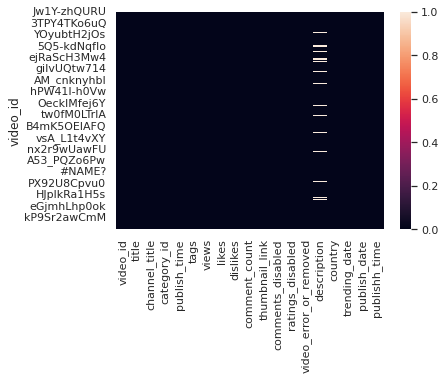

<Figure size 432x288 with 0 Axes>

In [18]:
sns.heatmap(data_frame.isnull(), cbar=True)
plt.figure()